In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from pylab import rcParams

In [25]:
## SepsisDataSet.csv
df = pd.read_csv('SepsisDataSet.csv')
df_sml = pd.read_csv('SepsisDataSet.csv')
df_xl = pd.read_csv('SepsisDataSet.csv')
df.shape

(1552210, 43)

In [27]:
df.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel', 'Patient_id', 'time'],
      dtype='object')

In [28]:
df_xl.drop(df_xl[df_xl.time >= 260].index, inplace=True)  
df_xl.drop(df_xl[df_xl.time <= 250].index, inplace=True) 

In [29]:
df_xl[df_xl['SepsisLabel']==1]['Patient_id'].value_counts()

24791    9
26008    9
14639    7
7071     7
27955    6
24880    6
33987    5
31243    5
4890     5
28809    5
4248     4
16       3
18891    2
28286    1
12724    1
20881    1
Name: Patient_id, dtype: int64

In [30]:
df_sml.drop(df_sml[df_sml.time >= 60].index, inplace=True)  
df_sml.drop(df_sml[df_sml.time <= 55].index, inplace=True) 

In [31]:
df_sml[df_sml['SepsisLabel']==1]['Patient_id'].value_counts()

4090     4
34788    4
20831    4
4449     4
1383     4
        ..
16655    1
1262     1
11469    1
5318     1
23032    1
Name: Patient_id, Length: 184, dtype: int64

In [33]:
# Get positiv sepsis patient with around 250h in the ICU
df_16=df[df['Patient_id'] == 16] 
df_71=df[df['Patient_id'] == 7071] 
df_24=df[df['Patient_id'] == 24880] 
df_20=df[df['Patient_id'] == 20881] 
df_33=df[df['Patient_id'] == 33987] 

In [34]:
# Get positiv sepsis patient with around 50h in the ICU 
df_49=df[df['Patient_id'] == 4090] 
df_88=df[df['Patient_id'] == 34788] 
df_44=df[df['Patient_id'] == 4449] 
df_62=df[df['Patient_id'] == 1262] 
df_23=df[df['Patient_id'] == 23032] 

In [96]:
def plott_xl(df):
    ##rcParams['figure.figsize'] = 15,5
    vitals = ['HR','O2Sat', 'Temp', 'SBP', 'DBP', 'Resp']
    fig, axes = plt.subplots(6, 1, sharex=True, figsize=(12,24))
    fig.suptitle('The six vitals from patient nr: {}'.format(df['Patient_id'].iloc[1]))
    
    for vital, ax in zip(vitals , axes.flatten()):
        sns.scatterplot(data=df, x="time", y=vital, hue="SepsisLabel", ax=ax)

def plott_sml(df):
    ##rcParams['figure.figsize'] = 15,5
    vitals = ['HR','O2Sat', 'Temp', 'SBP', 'DBP', 'Resp']
    fig, axes = plt.subplots(3, 2, sharex=True, figsize=(16,8))
    fig.suptitle('The six vitals from patient nr: {}'.format(df['Patient_id'].iloc[1]))
    
    for vital, ax in zip(vitals , axes.flatten()):
        sns.scatterplot(data=df, x="time", y=vital, hue="SepsisLabel", ax=ax)
        

def plot_vital(df,value='HR'):
    rcParams['figure.figsize'] = 15,5
    sns.scatterplot(data=df, x="time", y=vital, hue="SepsisLabel")        

In [97]:
def plot_all(df_nbrs_xl,df_nbrs_sml):
    
    for patient in df_nbrs_xl:
        plott_xl(patient)
    
    for patient in df_nbrs_sml:
        plott_sml(patient)

In [98]:
##plott_xl(df_16)

In [99]:
df_nbrs_xl = [df_16,df_71,df_24,df_20,df_33]
df_nbrs_sml = [df_49,df_88,df_44,df_62,df_23]

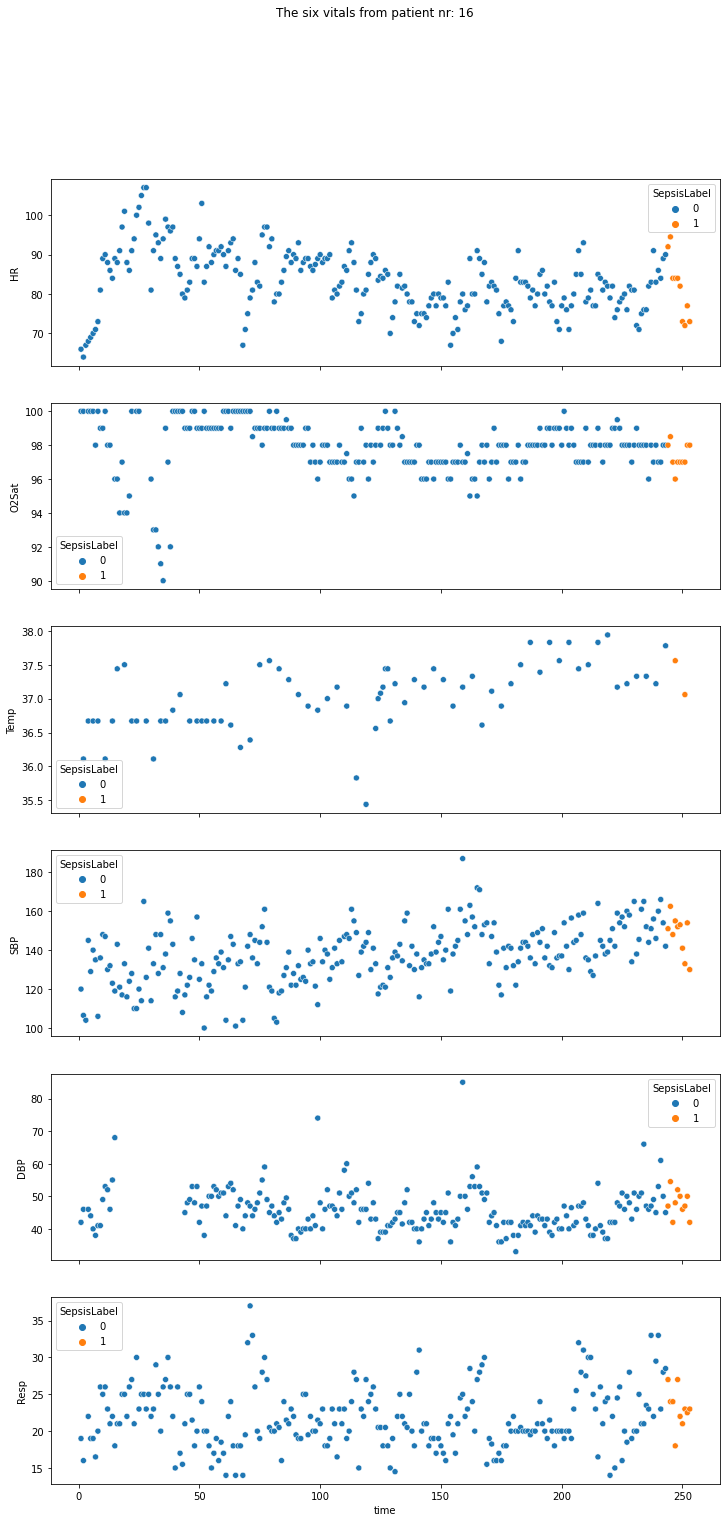

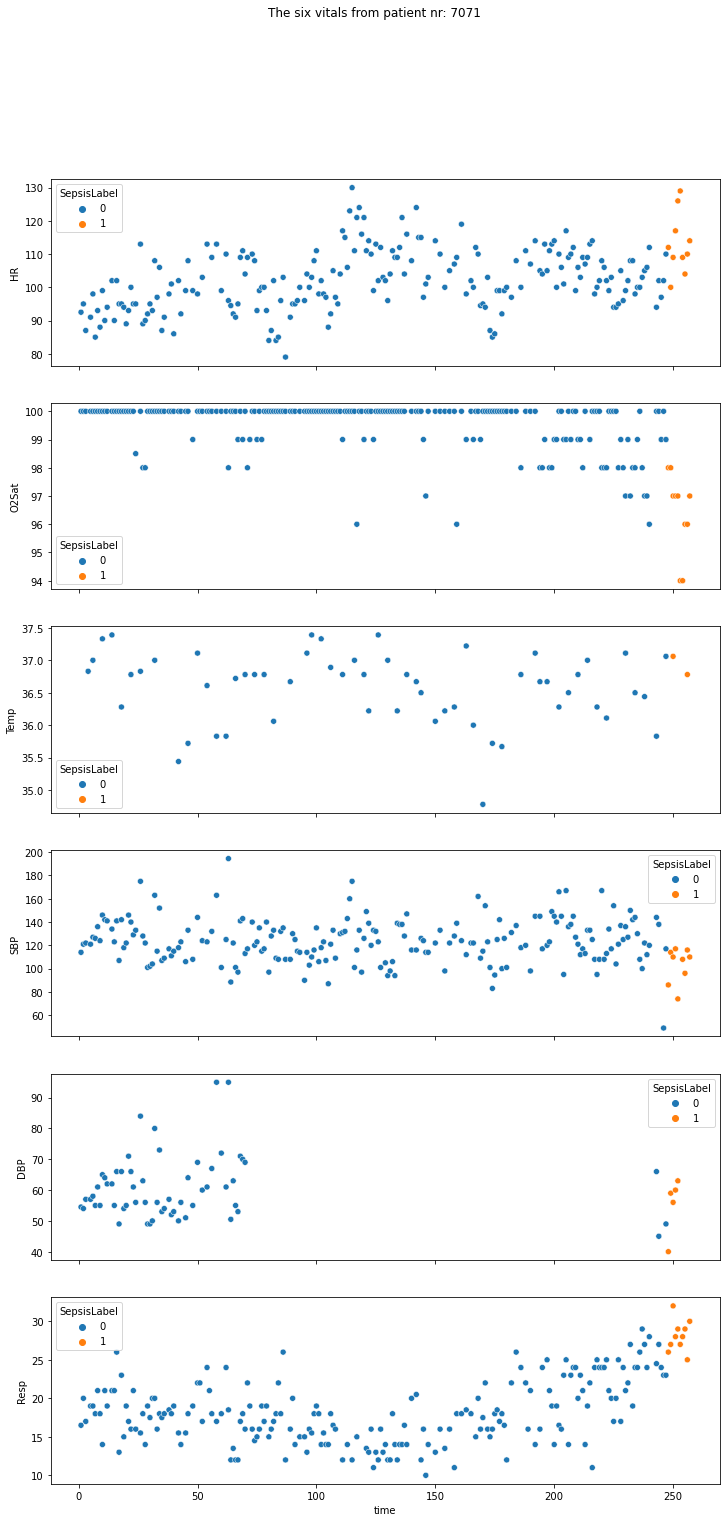

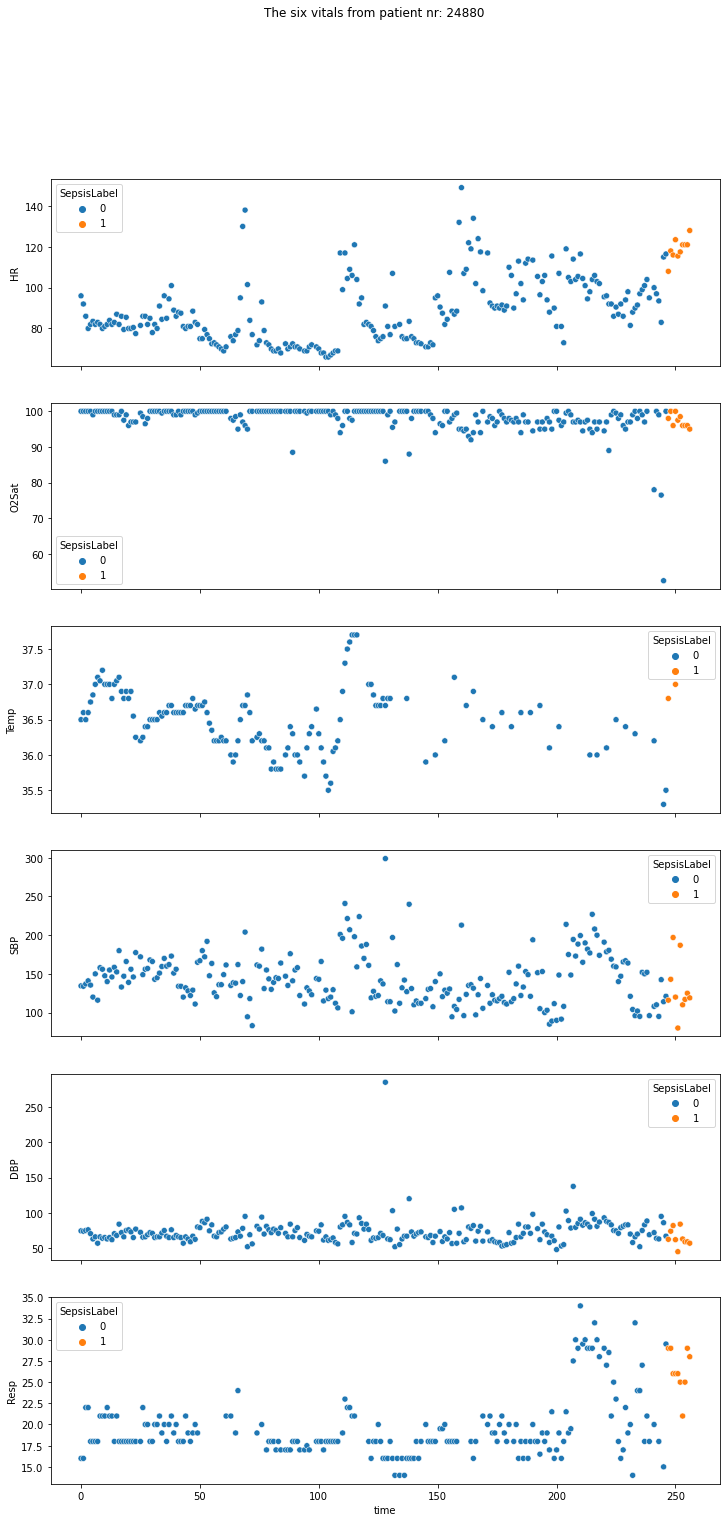

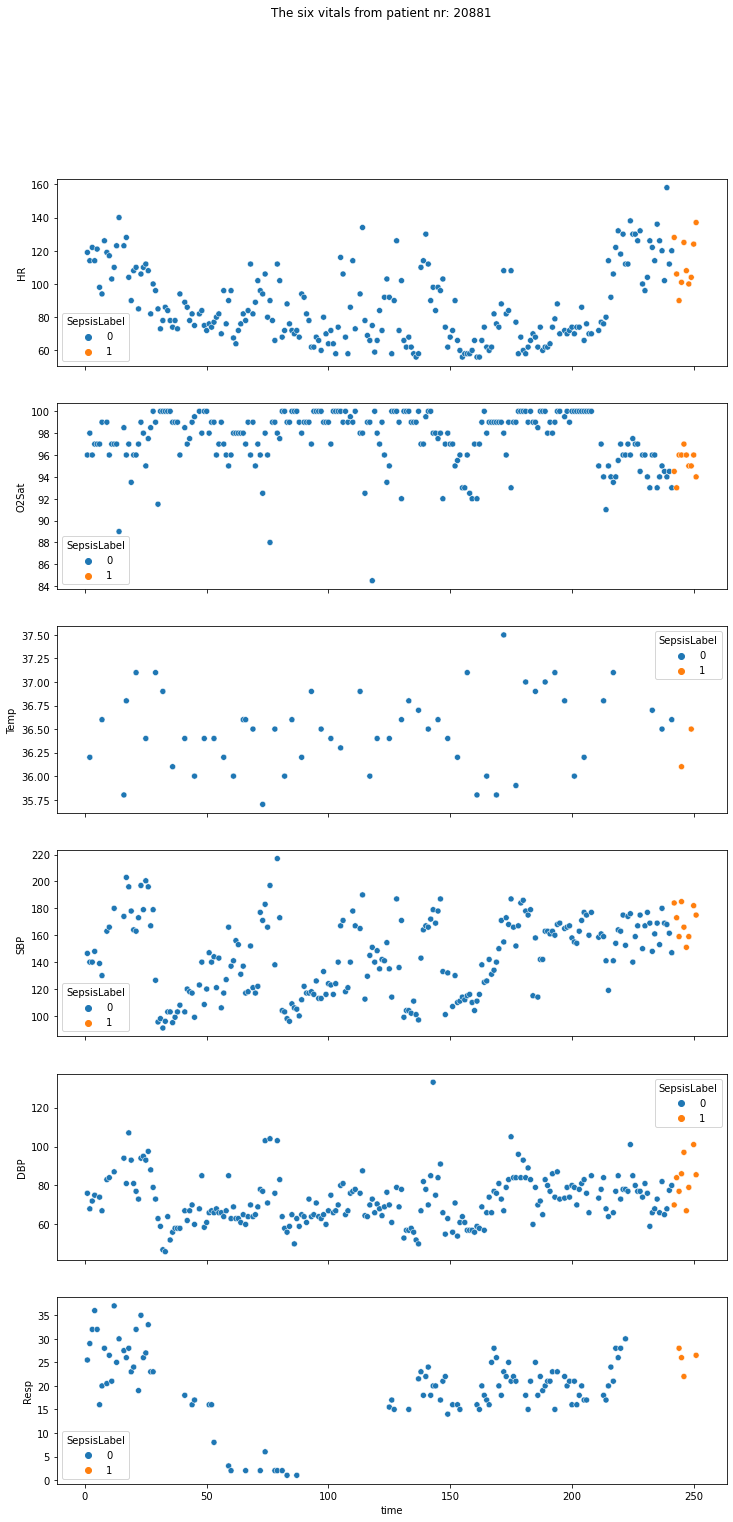

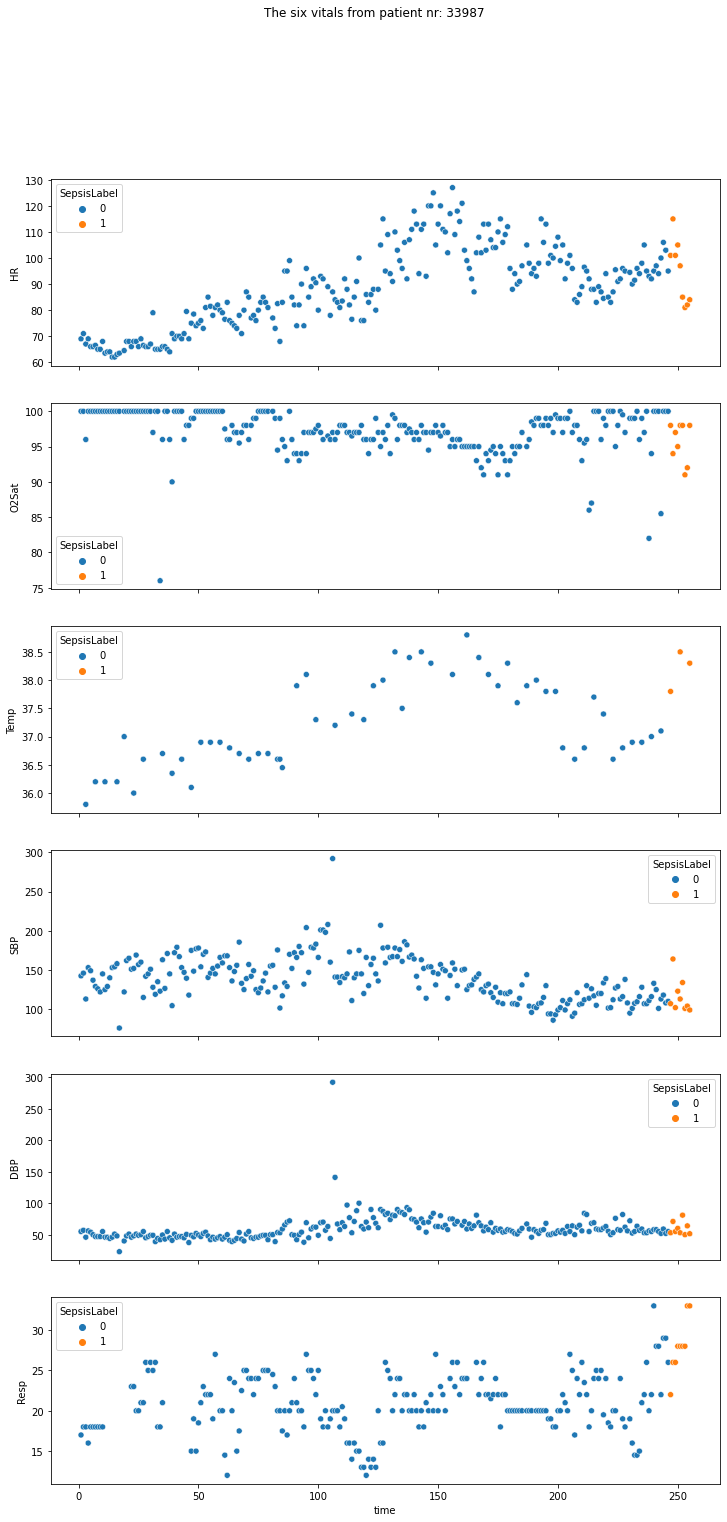

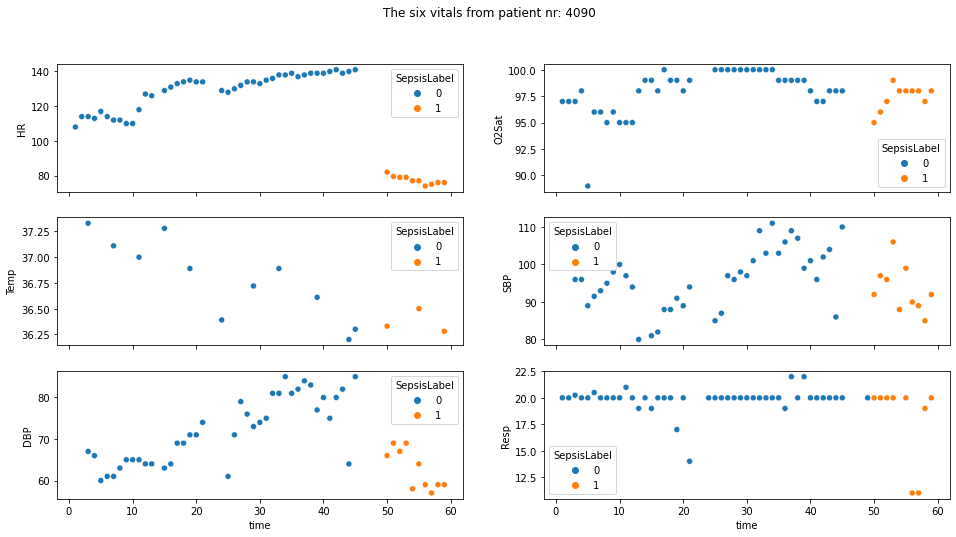

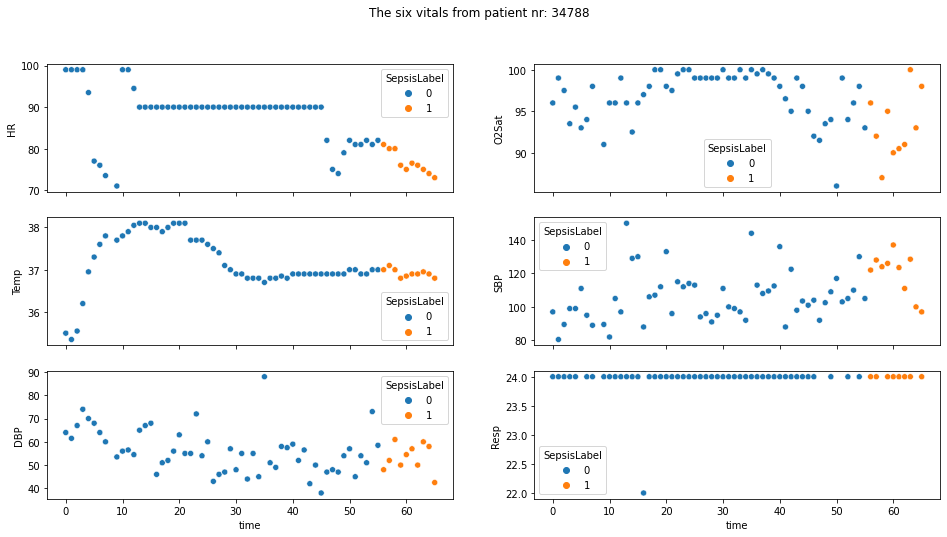

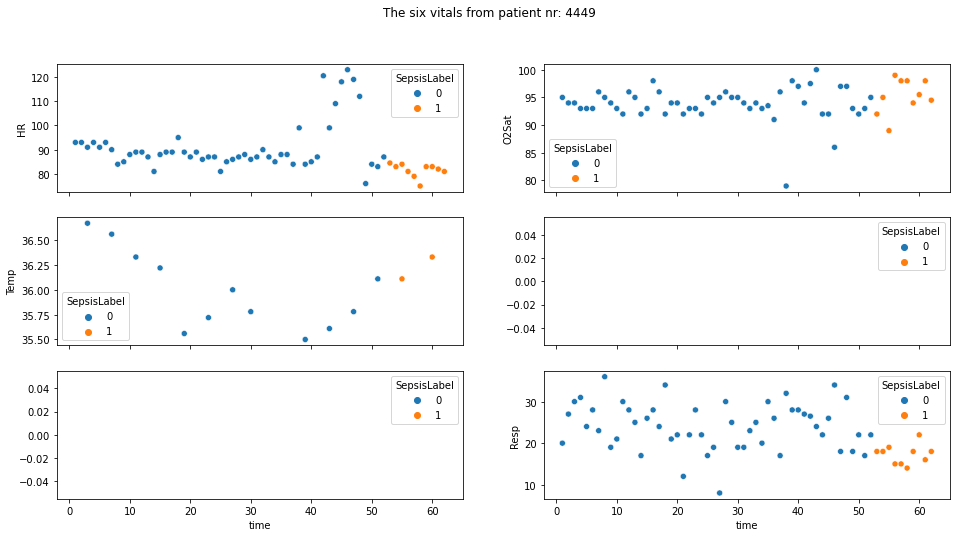

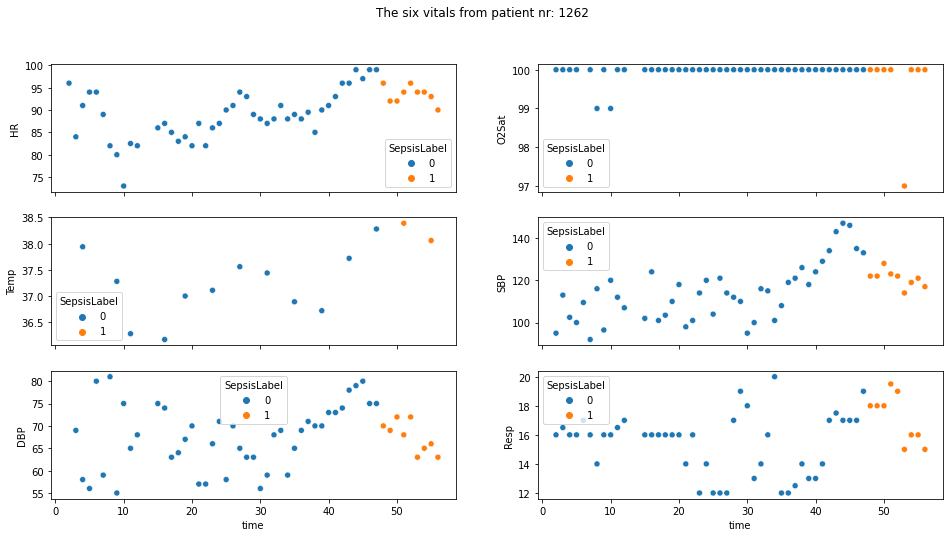

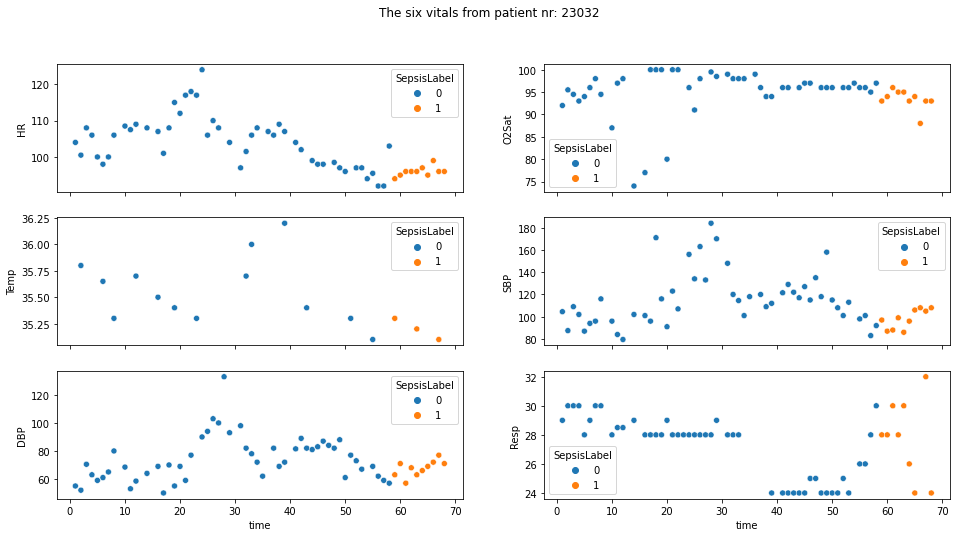

In [100]:
plot_all(df_nbrs_xl,df_nbrs_sml)